    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

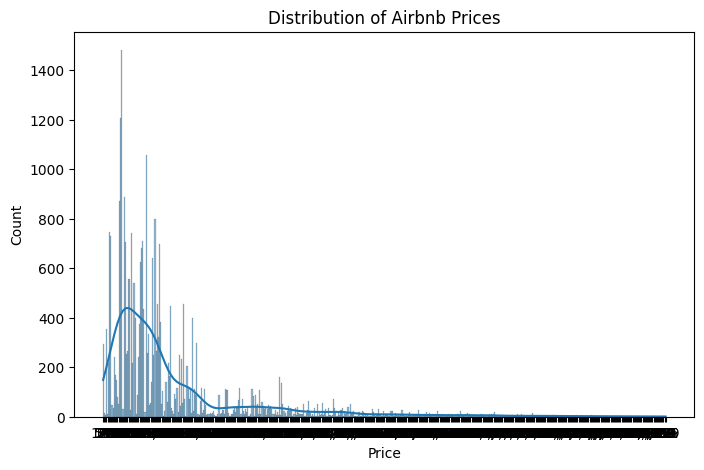

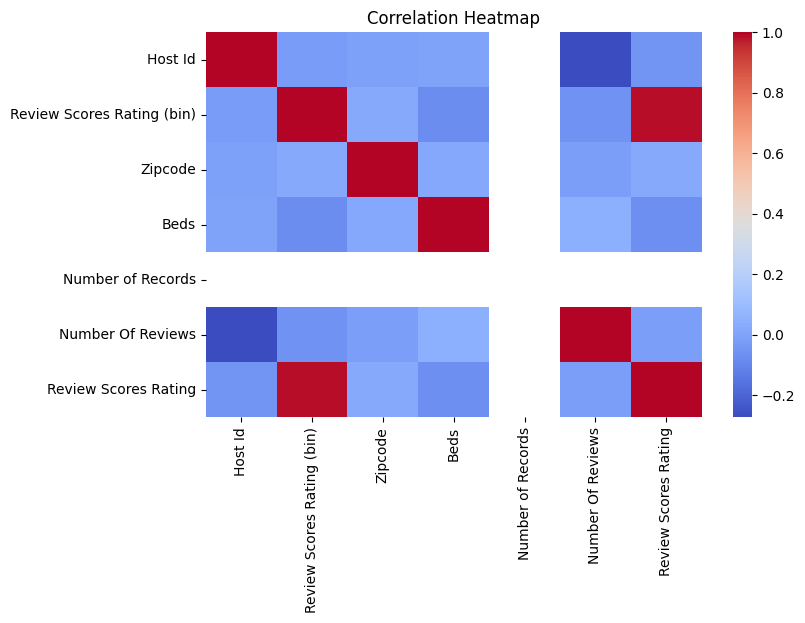

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Data
df = pd.read_csv("data/airbnb_hw.csv")

# Overview of Data (EDA)
print(df.head())
print(df.info())
print(df.describe())

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
print(df.isnull().sum())

# 3. CLEANING AND FEATURE ENGINEERING

# Drop columns not needed for modeling
df = df.drop(columns=['Host Id', 'Name', 'Review Scores Rating (bin)'], errors='ignore')

# Handle missing values
df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')
df['Host Since'] = df['Host Since'].fillna(df['Host Since'].median())

df['Property Type'] = df['Property Type'].fillna(df['Property Type'].mode()[0])
df['Zipcode'] = df['Zipcode'].fillna(df['Zipcode'].mode()[0])
df['Beds'] = df['Beds'].fillna(df['Beds'].median())
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].median())

# Create a derived variable: Host tenure (years)
df['Host Tenure (years)'] = (pd.Timestamp('today') - df['Host Since']).dt.days / 365
df['Host Tenure (years)'] = df['Host Tenure (years)'].fillna(df['Host Tenure (years)'].median())


Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64


In [17]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", cat_cols.tolist())

# One-hot encode all categorical variables (keep all categories)
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)

print("Shape after encoding:", df.shape)

Categorical columns to encode: ['Neighbourhood ', 'Property Type', 'Room Type', 'Price']
Shape after encoding: (30478, 545)
